In [1]:
# import library

import pandas as pd

In [3]:
# load dataset

dataset=pd.read_csv("CSUSHPISA.csv")
dataset

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       440 non-null    object 
 1   CSUSHPISA  440 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [8]:
# load dataset

dataset=pd.read_csv("CSUSHPISA.csv",parse_dates=['DATE'],index_col='DATE')
dataset

,CSUSHPISA
DATE,
1987-01-01,63.965
1987-02-01,64.424
1987-03-01,64.736
1987-04-01,65.132
1987-05-01,65.563
...,...
2023-04-01,300.198
2023-05-01,302.620
2023-06-01,304.651


# Plot 2D Graph

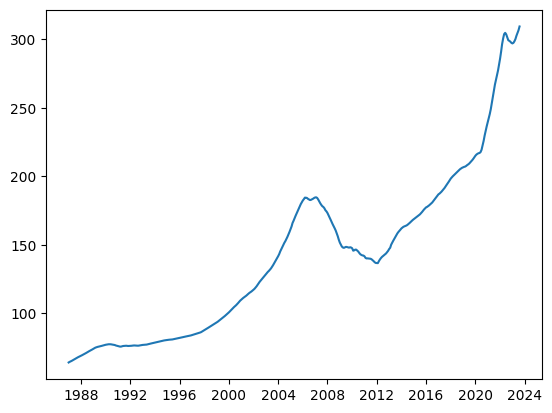

In [10]:
import matplotlib.pyplot as plt
plt.plot(dataset["CSUSHPISA"])

# Multiplicative
# Seasonal, Trend, Residual

<Figure size 1600x500 with 0 Axes>

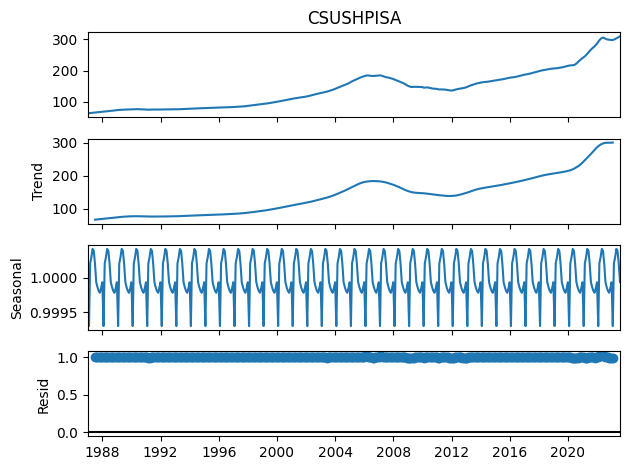

In [23]:
# Multiplicative

from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dataset["CSUSHPISA"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

# Additive
# Seasonal, Trend, Residual

<Figure size 1600x500 with 0 Axes>

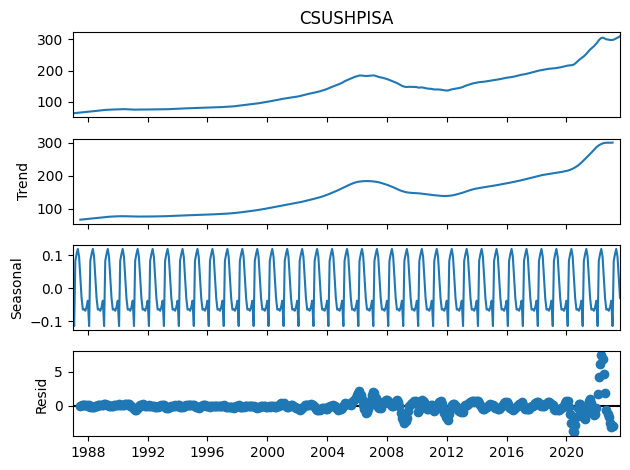

In [26]:
# Additive

from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dataset["CSUSHPISA"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

# Augmented Dickey Fuller Test

In [33]:

# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,homeprice):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statistic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statistic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[homeprice], label = homeprice)
    plt.legend(loc='best')
    plt.title("{}_{}_1987 to 2023".format(message,homeprice))
    plt.savefig("{}_ADH.png".format(homeprice))
    plt.show()
    
    return message
    
# Call the function and run the test



Results of Dickey-Fuller Test:
Test Statistic                   1.276957
p-value                          0.996477
#Lags Used                      18.000000
Number of Observations Used    421.000000
Critical Value (1%)             -3.445979
Critical Value (5%)             -2.868430
Critical Value (10%)            -2.570440
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statistic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


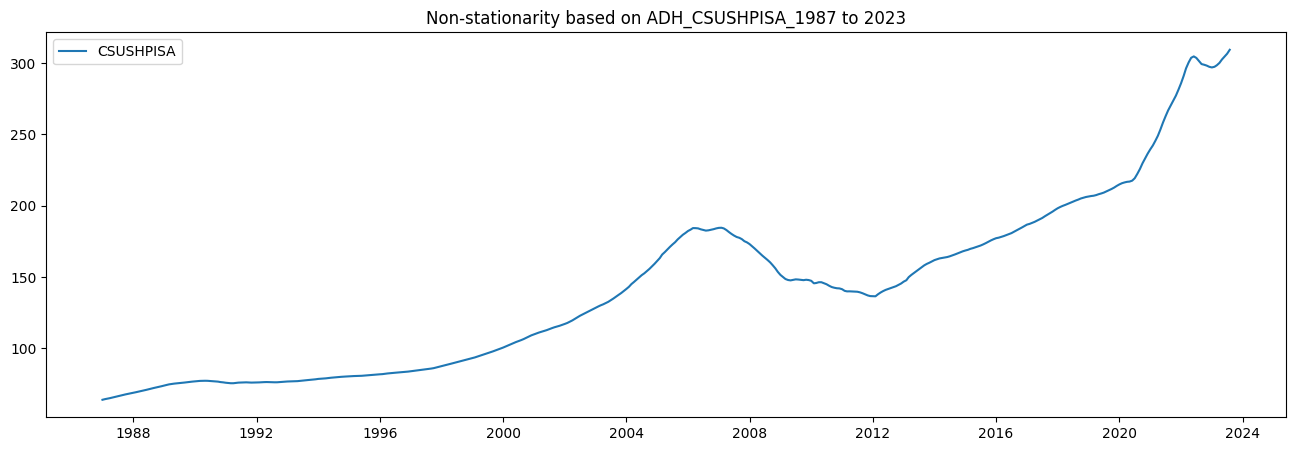

'Non-stationarity based on ADH'

In [34]:
adf_test(dataset["CSUSHPISA"],dataset,"CSUSHPISA")

# Autocorrelation

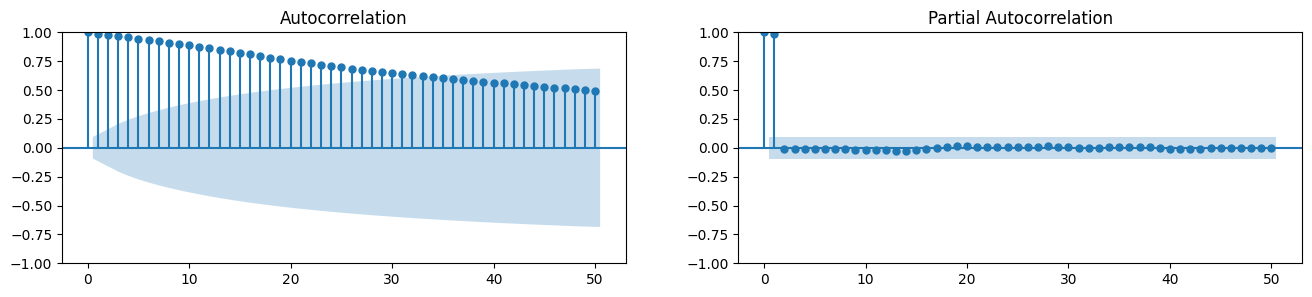

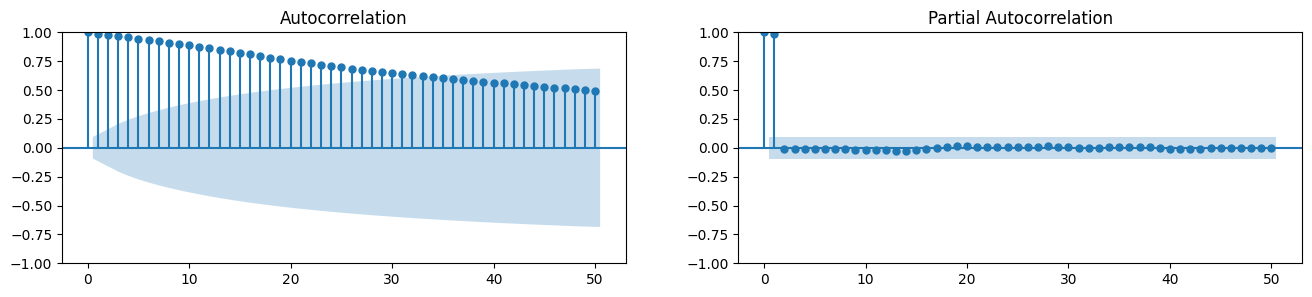

In [36]:
# Autocorrelation - linear relatiionship between lagged values of a time series
# x axis - lag values
# y axis - correlation

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.CSUSHPISA.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.CSUSHPISA.tolist(), lags=50, ax=axes[1])

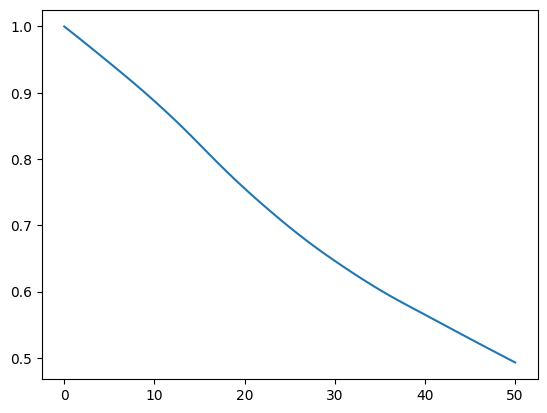

In [37]:
# Linear Autocorrelation

plt.plot(acf(dataset["CSUSHPISA"],nlags=50))

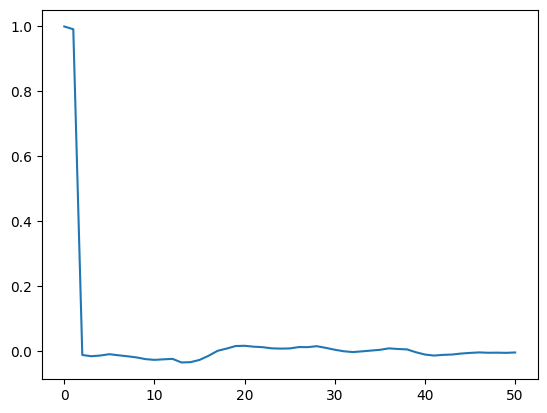

In [38]:
# Partial Autocorrelation

plt.plot(pacf(dataset["CSUSHPISA"],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

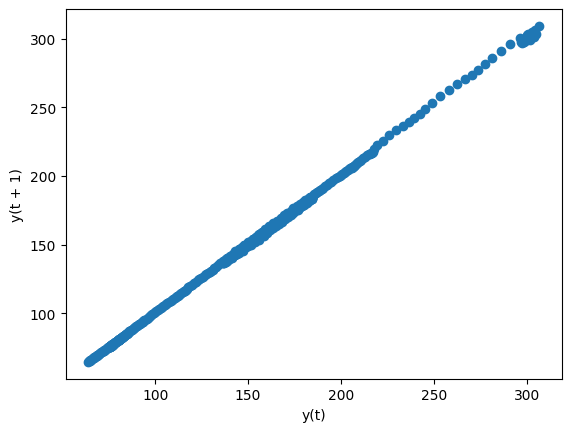

In [39]:
# Plotting Lag values

from pandas.plotting import lag_plot
lag_plot(dataset["CSUSHPISA"],lag=1)

# Forecastability of Time Series Data


#  Approximate Entropy (ApEn) 

In [40]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [41]:
import numpy as np
print(ApEn(dataset["CSUSHPISA"], m=2, r=0.2*np.std(dataset["CSUSHPISA"])))  

C:\Users\DELL\AppData\Local\Temp\ipykernel_3220\2578661817.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


0.02767766236209579


#  Sample Entropy (SampEn)

In [42]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [43]:
print(SampEn(dataset["CSUSHPISA"], m=2, r=0.2*np.std(dataset["CSUSHPISA"])))

C:\Users\DELL\AppData\Local\Temp\ipykernel_3220\1392444303.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


0.02465623926403468
